In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import matplotlib.pyplot as plt

# Data (Web Scraping)
##### data web (https://football-data.co.uk/englandm.php)

In [184]:
#selecting data
data = pd.read_csv('E0.csv')

#clearing data
columns_name = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','HS','AS','HST','AST','FTR']
data_clear = data.copy()
data_clear = data_clear[data_clear.columns.intersection(columns_name)]

# reaname columns
data_clear.rename(columns={
    'HomeTeam':'home_team',
    'AwayTeam':'away_team',
    'FTHG':'home_goals',
    'FTAG':'away_goals',
    'HS': 'home_shoot',
    'AS' : 'away_shoot',
    'HST' : 'home_shoot_on_target',
    'AST' : 'away_shoot_on_target',
    'FTR' : 'winner'
})

# fillna
def fill_ftr(row):
    if row['FTHG'] > row['FTAG']:
        return 'H'
    elif row['FTHG'] < row['FTAG']:
        return 'A'
    else:
        return 'D'

data_clear['FTR'] = data_clear.apply(lambda row: fill_ftr(row) if pd.isna(row['FTR']) else row['FTR'], axis=1)
data_clear['FTR'] = data_clear['FTR'].map({'H': 1, 'D': 0, 'A': -1})


# Make Clasement League

In [121]:
def convert_data(data_input):
    teams = list(data_input.HomeTeam.unique())
    result = []
    for team in teams:
        raw_data_home = data_input.loc[data_input.HomeTeam==team][['FTHG', 'FTAG','HS','HST']]
        raw_data_away = data_input.loc[data_input.AwayTeam==team][['FTHG', 'FTAG','AS','AST']]
        play = len(raw_data_home) + len(raw_data_away)
        win = (sum((raw_data_home['FTHG'] > raw_data_home['FTAG'])) + sum((raw_data_away['FTHG'] < raw_data_away['FTAG']))) or 0
        draw = (sum((raw_data_home['FTHG'] == raw_data_home['FTAG'])) + sum((raw_data_away['FTHG'] == raw_data_away['FTAG']))) or 0
        lose = (play - (win + draw))
        gf = ((raw_data_home.FTHG.sum() + raw_data_away.FTAG.sum()) or 0)
        ga = ((raw_data_home.FTAG.sum() + raw_data_away.FTHG.sum()) or 0)
        gd = gf - ga

        point = (win * 3 ) + draw

        data = [team, play, win, draw, lose, gf, ga, gd, point]
        result.append(data)

    return pd.DataFrame(result, columns = [
        'Team', 'Play', 'Win', 'Draw', 'Lose', 
        'Goals For (GF)', 'Goals Against (GA)', 
        'Goal Difference (GD)', 'Points'])

In [223]:
premier_league = convert_data(data_clear)
premier_league.to_csv('clasement_premier_league.csv', index=False)

In [123]:
# preview data
premier_league.sort_values('Points', ascending=False)

,Team,Play,Win,Draw,Lose,Goals For (GF),Goals Against (GA),Goal Difference (GD),Point
11,Arsenal,14,12,1,1,33,11,22,37
13,Man City,14,10,2,2,40,14,26,32
4,Newcastle,15,8,6,1,29,11,18,30
5,Tottenham,15,9,2,4,31,21,10,29
8,Man United,14,8,2,4,20,20,0,26
19,Liverpool,14,6,4,4,28,17,11,22
12,Brighton,14,6,3,5,23,19,4,21
18,Chelsea,14,6,3,5,17,17,0,21
16,Brentford,15,4,7,4,23,25,-2,19
0,Crystal Palace,14,5,4,5,15,18,-3,19


# Make Clasement with Prediction
###### total match = 19 * 2

to do:
make:
    1. Avg Goal
    2. Win Rate
    3. Clasement Prediction 

In [151]:
def convert_data_with_percentage(data_input):
    teams = list(data_input.HomeTeam.unique())
    result = []
    for team in teams:
        overallmatch = 38
        raw_data_home = data_input.loc[data_input.HomeTeam==team][['FTHG', 'FTAG','HS','HST']]
        raw_data_away = data_input.loc[data_input.AwayTeam==team][['FTHG', 'FTAG','AS','AST']]
        play = len(raw_data_home) + len(raw_data_away)
        win = (sum((raw_data_home['FTHG'] > raw_data_home['FTAG'])) + sum((raw_data_away['FTHG'] < raw_data_away['FTAG']))) or 0
        draw = (sum((raw_data_home['FTHG'] == raw_data_home['FTAG'])) + sum((raw_data_away['FTHG'] == raw_data_away['FTAG']))) or 0
        lose = (play - (win + draw))
        gf = ((raw_data_home.FTHG.sum() + raw_data_away.FTAG.sum()) or 0)
        ga = ((raw_data_home.FTAG.sum() + raw_data_away.FTHG.sum()) or 0)
        gd = gf - ga
        shoot = ((raw_data_away.AS.sum()) + raw_data_home.HS.sum() or 0)
        shoot_on_target = ((raw_data_away.AST.sum()) + raw_data_home.HST.sum() or 0)
        ps = format((((raw_data_away.AST.mean()) + raw_data_home.HST.mean() or 0) / ((raw_data_away.AS.mean()) + raw_data_home.HS.mean() or 0)or 0), '.1%')
        point = (win * 3 ) + draw
        avggf = format((gf/play), '.2f')
        avgga = format((ga/play), '.2f')
        winratio = format((win/play), '.2f')#, '.1%')
        drawratio = format((draw/play), '.2f')#, '.1%')
        loseratio = format((lose/play), '.2f')#, '.1%')

        data = [team, play, win, draw, lose, gf, ga, gd, shoot, shoot_on_target,ps, point, avggf, avgga, winratio, drawratio, loseratio]
        result.append(data)

    return pd.DataFrame(result, columns = [
        'Team', 'Play', 'Win', 'Draw', 'Lose', 
        'Goals For (GF)', 'Goals Against (GA)', 'Goal Difference (GD)','Shoots','Shoots on Target', 
        'Percentage Shoot', 'Points', 'AVG-GF', 'AVG-GA', 'Win-Ratio', 
        'Draw-Ratio' ,'Lose-Ratio'])

In [222]:
premier_league_with_percentage = convert_data_with_percentage(data_clear)
premier_league_with_percentage.to_csv('clasement_premier_league_with_percentage.csv', index=False)

In [215]:
# preview data
priv_data = premier_league_with_percentage.sort_values('Points', ascending=False)
priv_data

,Team,Play,Win,Draw,Lose,Goals For (GF),Goals Against (GA),Goal Difference (GD),Shoots,Shoots on Target,Percentage Shoot,Points,AVG-GF,AVG-GA,Win-Ratio,Draw-Ratio,Lose-Ratio
11,Arsenal,14,12,1,1,33,11,22,222,81,37.3%,37,2.36,0.79,0.86,0.07,0.07
13,Man City,14,10,2,2,40,14,26,247,88,35.6%,32,2.86,1.00,0.71,0.14,0.14
4,Newcastle,15,8,6,1,29,11,18,218,79,36.3%,30,1.93,0.73,0.53,0.40,0.07
5,Tottenham,15,9,2,4,31,21,10,222,89,39.8%,29,2.07,1.40,0.60,0.13,0.27
8,Man United,14,8,2,4,20,20,0,192,72,36.5%,26,1.43,1.43,0.57,0.14,0.29
19,Liverpool,14,6,4,4,28,17,11,240,88,36.8%,22,2.00,1.21,0.43,0.29,0.29
12,Brighton,14,6,3,5,23,19,4,195,77,39.5%,21,1.64,1.36,0.43,0.21,0.36
18,Chelsea,14,6,3,5,17,17,0,156,53,33.6%,21,1.21,1.21,0.43,0.21,0.36
16,Brentford,15,4,7,4,23,25,-2,155,64,41.4%,19,1.53,1.67,0.27,0.47,0.27
0,Crystal Palace,14,5,4,5,15,18,-3,154,53,34.4%,19,1.07,1.29,0.36,0.29,0.36


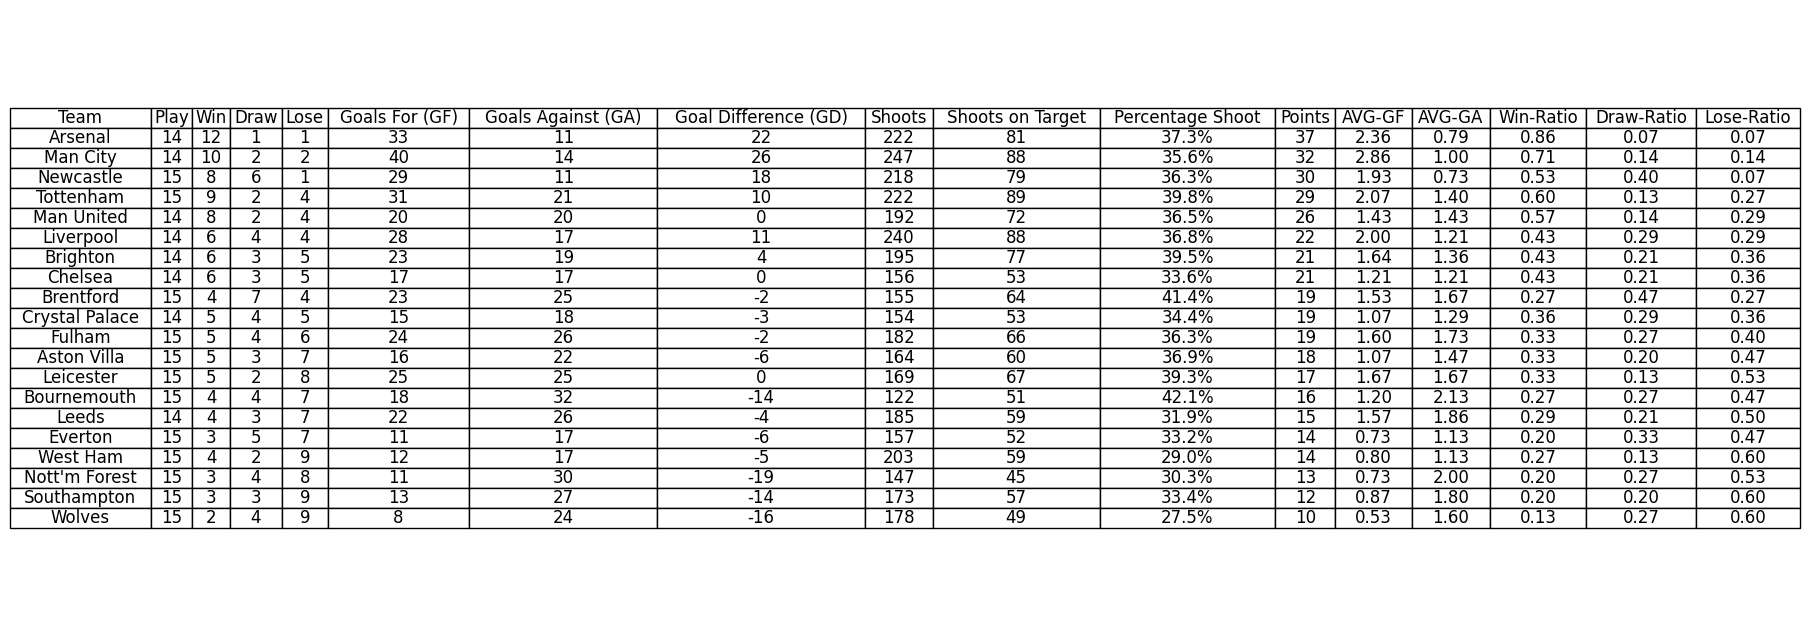

In [221]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=priv_data.values, colLabels=priv_data.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

for i in range(len(priv_data.columns)):
    max_length = max(priv_data[priv_data.columns[i]].astype(str).map(len).max(), len(priv_data.columns[i]))  
    table.auto_set_column_width(i)  
    table[i, 0].set_width(0.15 * max_length) 

plt.savefig("football_stats.png", bbox_inches='tight', dpi=300)
plt.show()

# Point Prediction

In [208]:
df = data_clear.copy()
label_encoder = LabelEncoder()
df['HomeTeam'] = label_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam'] = label_encoder.fit_transform(df['AwayTeam'])

df['HomeGoalDiff'] = df['FTHG'] - df['FTAG']
df['AwayGoalDiff'] = df['FTAG'] - df['FTHG']

# Memisahkan data untuk model home dan away
X_home = df[['HomeTeam', 'AwayTeam']]
y_home = df['FTHG']

X_away = df[['HomeTeam', 'AwayTeam']]
y_away = df['FTAG']

# Pisahkan data untuk model home
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

# Pisahkan data untuk model away
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, test_size=0.2, random_state=42)


# Model untuk Home Goals
model_home = LinearRegression()
model_home.fit(X_train_home, y_train_home)

# Model untuk Away Goals
model_away = LinearRegression()
model_away.fit(X_train_away, y_train_away)


Predicted Score: Newcastle 1.91 - 0.96 Chelsea


In [224]:
def predict_score(home_team, away_team):
    try:
        home_encoded = label_encoder.transform([home_team])[0]
        away_encoded = label_encoder.transform([away_team])[0]

        new_match = pd.DataFrame({
            'HomeTeam': [home_encoded],
            'AwayTeam': [away_encoded],
        })

        predicted_home_goals = model_home.predict(new_match)
        predicted_away_goals = model_away.predict(new_match)

        print(f"Predicted Score: {home_team} {predicted_home_goals[0]:.2f} - {predicted_away_goals[0]:.2f} {away_team}")

    except ValueError as e:
        print(f"Error: {e}. Please ensure that the team names are correct.")

# Example of user input
home_team = input("Enter Home Team: ")
away_team = input("Enter Away Team: ")

predict_score(home_team, away_team)

Predicted Score: Man City 1.73 - 1.16 Man United
